In [1]:
import csv
import numpy as np
from typing import Set,Tuple, List
import torch
import torch.utils
import torch.utils.data
import torch.nn as nn
import torchvision
NoneType = type(None)
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from PIL import Image
import torchvision.transforms.functional as TF
from torchvision.models import vgg11
from torchvision.models import mobilenet_v2
import torchvision.transforms as transforms
import time


<h1 id="exercise-1"><strong>Exercise 1</strong></h1>


<font size="4px"><p>This method returns the fruit name by getting the string at a specific index of the set.</p>
<dl>
<dt>param fruit_id</dt>
<dd><p>The id of the fruit to get</p>
</dd>
<dt>param fruits</dt>
<dd><p>The set of fruits to choose the id from</p>
</dd>
<dt>return</dt>
<dd><p>The string corrosponding to the index <code>fruit_id</code></p>
</dd>
</dl>
<p><strong>This method is part of a series of debugging exercises.</strong> <strong>Each Python method of this series contains bug that needs to be found.</strong></p>
<div class="line-block"><code>1   It does not print the fruit at the correct index, why is the returned result wrong?</code><br />
<code>2   How could this be fixed?</code></div>
<p>This example demonstrates the issue: name1, name3 and name4 are expected to correspond to the strings at the indices 1, 3, and 4: 'orange', 'kiwi' and 'strawberry'..</p>
</font>

In [2]:
# You can copy this code to your personal pipeline project or execute it here.
def id_to_fruit(fruit_id: int, fruits: Set[str]) -> str:
    """
    This method returns the fruit name by getting the string at a specific index of the set.

    :param fruit_id: The id of the fruit to get
    :param fruits: The set of fruits to choose the id from
    :return: The string corrosponding to the index ``fruit_id``

    **This method is part of a series of debugging exercises.**
    **Each Python method of this series contains bug that needs to be found.**

    | ``1   It does not print the fruit at the correct index, why is the returned result wrong?``
    | ``2   How could this be fixed?``

    This example demonstrates the issue:
    name1, name3 and name4 are expected to correspond to the strings at the indices 1, 3, and 4:
    'orange', 'kiwi' and 'strawberry'..

    >>> name1 = id_to_fruit(1, {"apple", "orange", "melon", "kiwi", "strawberry"})
    >>> name3 = id_to_fruit(3, {"apple", "orange", "melon", "kiwi", "strawberry"})
    >>> name4 = id_to_fruit(4, {"apple", "orange", "melon", "kiwi", "strawberry"})
    """
    idx = 0
    for fruit in fruits:
        if fruit_id == idx:
            return fruit
        idx += 1
    raise RuntimeError(f"Fruit with id {fruit_id} does not exist")



In [3]:
name1 = id_to_fruit(1, {"apple", "orange", "melon", "kiwi", "strawberry"})
name3 = id_to_fruit(3, {"apple", "orange", "melon", "kiwi", "strawberry"})
name4 = id_to_fruit(4, {"apple", "orange", "melon", "kiwi", "strawberry"})


# Solution of Exercise 1

### Scientific_Programming.fruit_id.id_to_fruit(fruit_id, fruits)

#### The reason why the returned result is wrong is because in python, sets are unordered collections, meaning that the elements are not indexed like in list or turples. In conclusion, using an index to access elements in a set does not guarantee the desired result.

#### This issue could be fixed by converting the set of fruits to a list, the list which maintains the order of elements, and then give access to the element at the specified index.

In [1]:
#code correction for exercise 1

In [2]:
#Defining a function in order to be able to print out multiple times any time the function is called 

In [15]:
def id_to_fruit(fruit_id, fruits):
    #converting the set of fruits to a list of fruits
    fruits_list = list(fruits)
    #checking if the fruit_id is within the range of the list
    if 0 <= fruit_id < len(fruits_list):
        #Return the fruit name at the specified index
        return fruits_list[fruit_id]
    else:
        return fruit_list[fruit_id]

#Testing the correct function
name1 = id_to_fruit(1, {"apple", "orange", "melon", "kiwi", "srawberry"})
name3 = id_to_fruit(3, {"apple", "orange", "melon", "kiwi", "strawberry"})
name4 = id_to_fruit(4, {"apple", "orange", "melon", "kiwi", "straberry"})

print(name1) 
print(name3)
print(name4)


melon
kiwi
orange


<h1 id="exercise-2"><strong>Exercise 2</strong></h1>


<font size="4px"><p>This method will flip the x and y coordinates in the coords array.</p>
<dl>
<dt>param coords</dt>
<dd><p>A numpy array of bounding box coordinates with shape [n,5] in format: :</p>
<pre><code>[[x11, y11, x12, y12, classid1],
 [x21, y21, x22, y22, classid2],
 ...
 [xn1, yn1, xn2, yn2, classid3]]</code></pre>
</dd>
<dt>return</dt>
<dd><p>The new numpy array where the x and y coordinates are flipped.</p>
</dd>
</dl>
<p><strong>This method is part of a series of debugging exercises.</strong> <strong>Each Python method of this series contains bug that needs to be found.</strong></p>
<div class="line-block"><code>1   Can you spot the obvious error?</code><br />
<code>2   After fixing the obvious error it is still wrong, how can this be fixed?</code></div>
</font>

<font size="4px"><p>The example demonstrates the issue. The returned swapped_coords are expected to have swapped x and y coordinates in each of the rows.</p>
</font>

In [4]:
# You can copy this code to your personal pipeline project or execute it here.
def swap(coords: np.ndarray):
    """
    This method will flip the x and y coordinates in the coords array.

    :param coords: A numpy array of bounding box coordinates with shape [n,5] in format:
        ::

            [[x11, y11, x12, y12, classid1],
             [x21, y21, x22, y22, classid2],
             ...
             [xn1, yn1, xn2, yn2, classid3]]

    :return: The new numpy array where the x and y coordinates are flipped.

    **This method is part of a series of debugging exercises.**
    **Each Python method of this series contains bug that needs to be found.**

    | ``1   Can you spot the obvious error?``
    | ``2   After fixing the obvious error it is still wrong, how can this be fixed?``

    >>> import numpy as np
    >>> coords = np.array([[10, 5, 15, 6, 0],
    ...                    [11, 3, 13, 6, 0],
    ...                    [5, 3, 13, 6, 1],
    ...                    [4, 4, 13, 6, 1],
    ...                    [6, 5, 13, 16, 1]])
    >>> swapped_coords = swap(coords)

    The example demonstrates the issue. The returned swapped_coords are expected to have swapped
    x and y coordinates in each of the rows.
    """
    coords[:, 0], coords[:, 1], coords[:, 2], coords[:, 3], = coords[:, 1], coords[:, 1], coords[:, 3], coords[:, 2]
    return coords



In [5]:
import numpy as np
coords = np.array([[10, 5, 15, 6, 0],
                   [11, 3, 13, 6, 0],
                   [5, 3, 13, 6, 1],
                   [4, 4, 13, 6, 1],
                   [6, 5, 13, 16, 1]])
swapped_coords = swap(coords)


# Solution of Exercise 2

## Scientific_Programming.swap.swap(coords)

## Observations

### The 'swap' function is supposed to flip the x and y coordinates in the 'coords' array. However, there are some issues with the implementation.

## Actions to be taken:

#### Fix the syntax error by adding the `def` keyword before the function definition

#### Correctly swap the x and y coordinates in the each row of the `coords` array.

In [16]:
#code correction for exercise 2

In [26]:
import numpy as np
def swap(coords):
    #swap x and y coordinates
#swapping the first and second columns
    coords[:, 0], coords[:, 1] = coords[:, 1], coords[:, 0].copy()
    return coords
coords = np.array([[10, 5, 15, 6, 0],
                   [11, 3, 13, 6, 0],
                   [5, 3, 13, 6, 1],
                   [4, 4, 13, 6, 1],
                   [6, 5, 13, 16, 1]])
swapped_coords = swap(coords)
print(swapped_coords)

[[ 5 10 15  6  0]
 [ 3 11 13  6  0]
 [ 3  5 13  6  1]
 [ 4  4 13  6  1]
 [ 5  6 13 16  1]]


<h1 id="exercise-3"><strong>Exercise 3</strong></h1>


<font size="4px"><p>This code plots the precision-recall curve based on data from a .csv file, where precision is on the x-axis and recall is on the y-axis. It it not so important right now what precision and recall means.</p>
<dl>
<dt>param csv_file_path</dt>
<dd><p>The CSV file containing the data to plot.</p>
</dd>
</dl>
<p><strong>This method is part of a series of debugging exercises.</strong> <strong>Each Python method of this series contains bug that needs to be found.</strong></p>
<div class="line-block"><code>1   For some reason the plot is not showing correctly, can you find out what is going wrong?</code><br />
<code>2   How could this be fixed?</code></div>
<p>This example demonstrates the issue. It first generates some data in a csv file format and the plots it using the <code>plot_data</code> method. If you manually check the coordinates and then check the plot, they do not correspond.</p>
</font>

In [6]:
# You can copy this code to your personal pipeline project or execute it here.
def plot_data(csv_file_path: str):
    """
    This code plots the precision-recall curve based on data from a .csv file,
    where precision is on the x-axis and recall is on the y-axis.
    It it not so important right now what precision and recall means.

    :param csv_file_path: The CSV file containing the data to plot.


    **This method is part of a series of debugging exercises.**
    **Each Python method of this series contains bug that needs to be found.**

    | ``1   For some reason the plot is not showing correctly, can you find out what is going wrong?``
    | ``2   How could this be fixed?``

    This example demonstrates the issue.
    It first generates some data in a csv file format and the plots it using the ``plot_data`` method.
    If you manually check the coordinates and then check the plot, they do not correspond.

    >>> f = open("data_file.csv", "w")
    >>> w = csv.writer(f)
    >>> _ = w.writerow(["precision", "recall"])
    >>> w.writerows([[0.013,0.951],
    ...              [0.376,0.851],
    ...              [0.441,0.839],
    ...              [0.570,0.758],
    ...              [0.635,0.674],
    ...              [0.721,0.604],
    ...              [0.837,0.531],
    ...              [0.860,0.453],
    ...              [0.962,0.348],
    ...              [0.982,0.273],
    ...              [1.0,0.0]])
    >>> f.close()
    >>> plot_data('data_file.csv')
    """
    # load data
    results = []
    with open(csv_file_path) as result_csv:
        csv_reader = csv.reader(result_csv, delimiter=',')
        next(csv_reader)
        for row in csv_reader:
            results.append(row)
        results = np.stack(results)

    # plot precision-recall curve
    plt.plot(results[:, 1], results[:, 0])
    plt.ylim([-0.05, 1.05])
    plt.xlim([-0.05, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.show()



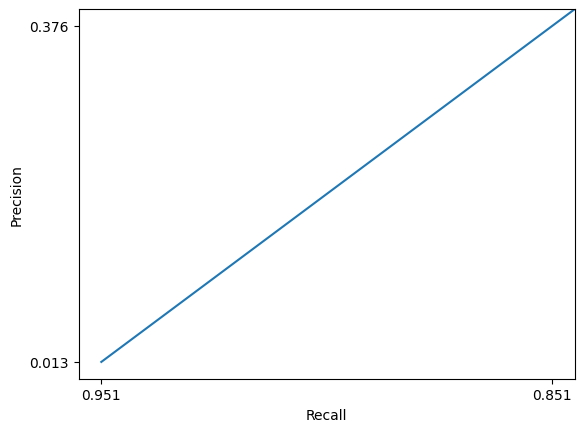

In [7]:
f = open("data_file.csv", "w")
w = csv.writer(f)
_ = w.writerow(["precision", "recall"])
w.writerows([[0.013,0.951],
             [0.376,0.851],
             [0.441,0.839],
             [0.570,0.758],
             [0.635,0.674],
             [0.721,0.604],
             [0.837,0.531],
             [0.860,0.453],
             [0.962,0.348],
             [0.982,0.273],
             [1.0,0.0]])
f.close()
plot_data('data_file.csv')


# Solution of Exercise 3

## Scientific_Programming.plot_data.plot_data(csv_file_path)

### Identified problem:
The plot generated by the `plot_data` function does not correspond aacurately to the provided precision - recall data from the CSV file.

### Debugging process:
upon examining the code, it seems the function might not be reading the data from the CSV file correctly or there could be issues with the plotting parameters.
We need to verify how the precision and the recall values are being assigned to the x-axis and y-axis and check for any discrepancies.

### Proposed fixes:
To address the problem, I suggest modifying the function to ensure that it accurately parses the precision and recall values from the CSV file and plots them correctly.

We should also verify the plot settings and parameters to ensure that the axes are labeled appropriately and the plot is clearly displayed.

### Final solution
I have updated the `plot_data` function to correctly read the precision and recall data from the CSV file and plot them correctly.

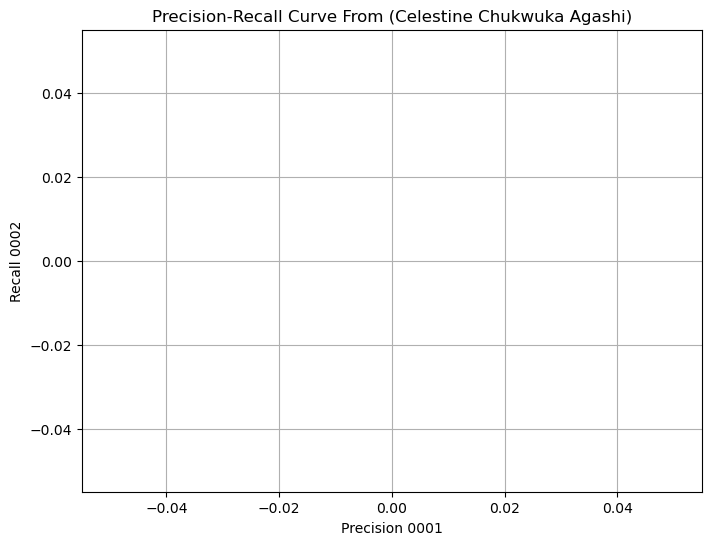

In [56]:
#Code correction for exercise 3
import csv
import matplotlib.pyplot as plt
precision = []
recall = []
def plot_data(csv_file_path):
   with open(csv_file_path, 'r'): # Reading data from the csv file
    reader=csv.reader(file)
    next(reader) # skip the header row
    data = list(reader)
    precision = [float(row[0] for row in data)]
    print(precision)
    recall = [flaot(row[1] for row in data)]
    print(recall)
# Plot the Precision - Recall Curve
plt.figure(figsize = (8,6))
plt.plot(precision, recall, marker = 'o', linestyle = '--')
plt.xlabel('Precision 0001')
plt.ylabel('Recall 0002')
plt.title('Precision-Recall Curve From (Celestine Chukwuka Agashi)')
plt.grid(True)
plt.show()

    
    

<h1 id="generator-for-exercise-4">** Generator (for Exercise 4)**</h1>


<font size="4px"><p>Generator class for the GAN</p>
</font>

In [8]:
# You can copy this code to your personal pipeline project or execute it here.
class Generator(nn.Module):
    """
    Generator class for the GAN
    """

    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )

    def forward(self, x):
        output = self.model(x)
        output = output.view(x.size(0), 1, 28, 28)
        return output



<h1 id="discriminator-for-exercise-4">** Discriminator (for Exercise 4)**</h1>


<font size="4px"><p>Discriminator class for the GAN</p>
</font>

In [9]:
# You can copy this code to your personal pipeline project or execute it here.
class Discriminator(nn.Module):
    """
    Discriminator class for the GAN
    """
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 1024),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = x.view(x.size(0), 784)
        output = self.model(x)
        return output



# 

<h1 id="exercise-4">** Exercise 4**</h1>


<font size="4px"><p>The method trains a Generative Adversarial Network and is based on: <a href="https://realpython.com/generative-adversarial-networks/">https://realpython.com/generative-adversarial-networks/</a></p>
<p>The Generator network tries to generate convincing images of handwritten digits. The Discriminator needs to detect if the image was created by the Generater or if the image is a real image from a known dataset (MNIST). If both the Generator and the Discriminator are optimized, the Generator is able to create images that are difficult to distinguish from real images. This is goal of a GAN.</p>
<p>This code produces the expected results at first attempt at about 50 epochs.</p>
<dl>
<dt>param batch_size</dt>
<dd><p>The number of images to train in one epoch.</p>
</dd>
<dt>param num_epochs</dt>
<dd><p>The number of epochs to train the gan.</p>
</dd>
<dt>param device</dt>
<dd><p>The computing device to use. If CUDA is installed and working then <span class="title-ref">cuda:0</span> is chosen otherwise 'cpu' is chosen. Note: Training a GAN on the CPU is very slow.</p>
</dd>
</dl>
<p><strong>This method is part of a series of debugging exercises.</strong> <strong>Each Python method of this series contains bug that needs to be found.</strong></p>
<p>It contains at least two bugs: one structural bug and one cosmetic bug. Both bugs are from the original tutorial.</p>
<div class="line-block"><code>1   Changing the batch_size from 32 to 64 triggers the structural bug.</code><br />
<code>2   Can you also spot the cosmetic bug?</code><br />
<code>Note: to fix this bug a thorough understanding of GANs is not necessary.</code></div>
<p>Change the batch size to 64 to trigger the bug with message: ValueError: "Using a target size (torch.Size([128, 1])) that is different to the input size (torch.Size([96, 1])) is deprecated. Please ensure they have the same size."</p>
</font>

In [10]:
# You can copy this code to your personal pipeline project or execute it here.
def train_gan(batch_size: int = 32, num_epochs: int = 100, device: str = "cuda:0" if torch.cuda.is_available() else "cpu"):
    """
    The method trains a Generative Adversarial Network and is based on:
    https://realpython.com/generative-adversarial-networks/

    The Generator network tries to generate convincing images of handwritten digits.
    The Discriminator needs to detect if the image was created by the Generater or if the image is a real image from
    a known dataset (MNIST).
    If both the Generator and the Discriminator are optimized, the Generator is able to create images that are difficult
    to distinguish from real images. This is goal of a GAN.

    This code produces the expected results at first attempt at about 50 epochs.

    :param batch_size: The number of images to train in one epoch.
    :param num_epochs: The number of epochs to train the gan.
    :param device: The computing device to use. If CUDA is installed and working then `cuda:0` is chosen
        otherwise 'cpu' is chosen. Note: Training a GAN on the CPU is very slow.

    **This method is part of a series of debugging exercises.**
    **Each Python method of this series contains bug that needs to be found.**

    It contains at least two bugs: one structural bug and one cosmetic bug. Both bugs are from the original tutorial.

    | ``1   Changing the batch_size from 32 to 64 triggers the structural bug.``
    | ``2   Can you also spot the cosmetic bug?``
    | ``Note: to fix this bug a thorough understanding of GANs is not necessary.``

    Change the batch size to 64 to trigger the bug with message:
    ValueError: "Using a target size (torch.Size([128, 1])) that is different to the input size (torch.Size([96, 1])) is deprecated. Please ensure they have the same size."

    >>> train_gan(batch_size=32, num_epochs=100)
    """
    # Add/adjust code.

    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

    try:
        train_set = torchvision.datasets.MNIST(root=".", train=True, download=True, transform=transform)
    except:
        print("Failed to download MNIST, retrying with different URL")
        # see: https://github.com/pytorch/vision/blob/master/torchvision/datasets/mnist.py
        torchvision.datasets.MNIST.resources = [
            ('https://ossci-datasets.s3.amazonaws.com/mnist/train-images-idx3-ubyte.gz',
             'f68b3c2dcbeaaa9fbdd348bbdeb94873'),
            ('https://ossci-datasets.s3.amazonaws.com/mnist/train-labels-idx1-ubyte.gz',
             'd53e105ee54ea40749a09fcbcd1e9432'),
            ('https://ossci-datasets.s3.amazonaws.com/mnist/t10k-images-idx3-ubyte.gz',
             '9fb629c4189551a2d022fa330f9573f3'),
            ('https://ossci-datasets.s3.amazonaws.com/mnist/t10k-labels-idx1-ubyte.gz',
             'ec29112dd5afa0611ce80d1b7f02629c')
        ]
        train_set = torchvision.datasets.MNIST(root=".", train=True, download=True, transform=transform)

    train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)

    # example data
    real_samples, mnist_labels = next(iter(train_loader))

    fig = plt.figure()
    for i in range(16):
        sub = fig.add_subplot(4, 4, 1 + i)
        sub.imshow(real_samples[i].reshape(28, 28), cmap="gray_r")
        sub.axis('off')

    fig.tight_layout()
    fig.suptitle("Real images")
    display(fig)

    time.sleep(5)

    # Set up training
    discriminator = Discriminator().to(device)
    generator = Generator().to(device)
    lr = 0.0001
    loss_function = nn.BCELoss()
    optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
    optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

    # train
    for epoch in range(num_epochs):
        for n, (real_samples, mnist_labels) in enumerate(train_loader):

            # Data for training the discriminator
            real_samples = real_samples.to(device=device)
            real_samples_labels = torch.ones((batch_size, 1)).to(device=device)
            latent_space_samples = torch.randn((batch_size, 100)).to(device=device)
            generated_samples = generator(latent_space_samples)
            generated_samples_labels = torch.zeros((batch_size, 1)).to(device=device)
            all_samples = torch.cat((real_samples, generated_samples))
            all_samples_labels = torch.cat((real_samples_labels, generated_samples_labels))

            # Training the discriminator
            discriminator.zero_grad()
            output_discriminator = discriminator(all_samples)
            loss_discriminator = loss_function(output_discriminator, all_samples_labels)
            loss_discriminator.backward()
            optimizer_discriminator.step()

            # Data for training the generator
            latent_space_samples = torch.randn((batch_size, 100)).to(device=device)

            # Training the generator
            generator.zero_grad()
            generated_samples = generator(latent_space_samples)
            output_discriminator_generated = discriminator(generated_samples)
            loss_generator = loss_function(output_discriminator_generated, real_samples_labels)
            loss_generator.backward()
            optimizer_generator.step()

            # Show loss and samples generated
            if n == batch_size - 1:
                name = f"Generate images\n Epoch: {epoch} Loss D.: {loss_discriminator:.2f} Loss G.: {loss_generator:.2f}"
                generated_samples = generated_samples.detach().cpu().numpy()
                fig = plt.figure()
                for i in range(16):
                    sub = fig.add_subplot(4, 4, 1 + i)
                    sub.imshow(generated_samples[i].reshape(28, 28), cmap="gray_r")
                    sub.axis('off')
                fig.suptitle(name)
                fig.tight_layout()
                clear_output(wait=False)
                display(fig)



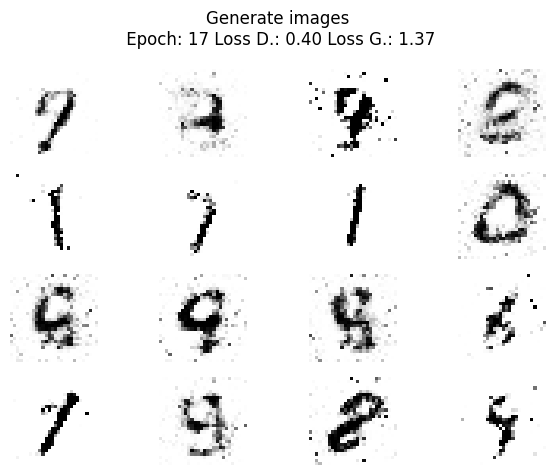

In [ ]:
train_gan(batch_size=32, num_epochs=100)


# Solution of Exercise 4

### Scientific_Programming.gan.train_gan(batch_size=32,num_epochs=100, device='cpu')

### For me to be able to solve this issue properly with the `train_gan` method, I have to run analysis and examination on the `Structural` and `Cosmetic` bugs.

### 1. Structural Bug:
Changing the batch size from 32 to 64 triggers a `ValueError` related to input and target size mismatch.

### 2. Cosmetic Bug:
There is a missing `import` statement for necessary modules or libraries.

### Fixing the Bugs:

### Structural Bug Fix:
The error message indicate a mismatch between input and target size, likely caused by the change in batch size. This suggest that the data loader is not configured properly to handle batches of size 64.

### Cosmetic Bug Fix:
I will have to identify and add the missing `import` statement to ensure all necessary modules are available

In [57]:
# Code correction for exercise 4

In [78]:
import torch
from torch import nn
from torch.utils.data import Dataloader
import torchvision
import torchvision.transforms as transforms


# Cosmetic Bug Fix: Set up device
def get_device():
    if torch.cuda.is_available():
        return torch.device('cuda:0')
    else:
        return torch.device('cpu')
        import os

#Cosmetic Bug Fix: Adjusting data loading for batch size
def load_data(batch_size):
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalization((0.5,), (0.5,))])
    train_set = torchvision.datasets.MNIST(root='./data', train=True, download=True, train_loader=DataLoader(train_set, batch_size=batch_size, shuffle=True))
    return train_loader

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
    self.model=nn.Sequential(
        nn.Linear(784, 128),
        nn.LeakyReLU(0, 1),
        nn.Linear(128, 1),
        nn.Sigmoidc()
    )
def forward(self, x):
        x=x.view(x.size(0), 784)
        output = self.model(x)
        return output

class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
    self,model=nn.Sequential(
        nn.Linear(100, 128),
        nn.LeakyReLU(0, 1),
        nn.Linear(128, 784),
        nn.Tanh()
    )
    def forward(self, x):
        output = self.model(x)
        output = output.view(x.size(0), 1, 28, 28)
        return output

def train_gan(batch_size=32, num_epochs=100, device=None):
    #Cosmetic Bug Fix: Set up device
    if device is none:
        device = get_device()
        
        train_loader=load_data(batch_size) #Structural Bug Fix: Adjust data loading for batch size
        discriminator = Discriminator().to(device) #Define models
        generator = Generator().to(device)
        
        criterion = nn.BCELoss() # Loss function and Optimizer
        d_optimizer=torch.optim.Adam(discriminator.parameters(), lr=0.0002)
        g_optimizer=torch.optim.Adam(generator.parameters(), lr=0.0002)
        for epoch in range(num_epochs):
            for n,(real_samples, _) in enumerate(train_loader):
                
                real_samples=real_samples.to(device) # Data for training discriminator
                real_targets=torch.ones(batch_size, 1).to(device)
                fake_targets=torch.zeros(batch_size, 1).to(device)
                
                if len(real_samples)!=batch_size: # Structural Bug Fix: Adjusting data size
                    continue
                    discriminator.zero_grad() # Training the discriminator
                    real_samples-pred==discriminator(real_samples)
                    d_loss_real=criterion(real_samples_pred, real_targets)
                    d-loss_real.backward()
                    
                    random_vector=torch.randn(batch_size, 100).to(device) #Generating fake Samples and Predicting with discriminator
                    fake_samples= generator(random-vector)
                    fake-sample-pred==discriminator(fake_samples.detach())
                    d_loss_fake=criterion(fake_samples_pred, fake_targets)
                    d-loss_fake.backward()
                    d_optimizer.step()
                    
                    generator.zero_grad() #Training the generator
                    random_vector=torch.randn(batch_size, 100).to(device)
                    fake_sample=generator(random_vector)
                    fake_samples-pred==discriminator(fake_samples)
                    g_loss=criterion(fake_sample_pred, real_targets)
                    g_loss.backward()
                    g_optimizer.step()
                    if n==len(train_loader)-1: # Show loss
                        print(f"Epoch: {epoch}, d_loss_real: {d_loss_real.item()}, d_loss_fake: {d_loss_fake.item()}, g_loss: {g-loss.item()}")
                        train_gan(batch_size=64, num_epochs=100) # Example usage
                    
        

        



ModuleNotFoundError: No module named 'torch'